In [2]:
#first we will make the figure comparing the models

#now that we know it's correct let's load in all the data
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt')
mult_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_reg.pt')
mult_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_class.pt')
mult_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
print(mult_target_reg.shape, mult_pred_reg.shape, mult_target_class.shape, mult_pred_class.shape) #all are identical as expected
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == mult_target_reg))
print(torch.all(mult_target_reg == mult2_target_reg))
#perfect!
print(torch.all(ctst_target_class == mult_target_class))
print(torch.all(mult_target_class == mult2_target_class))
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg
#now we can calculate the metrics
#first let's find the correlation per row for the regression

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
tensor(True)
tensor(True)
tensor(True)
tensor(True)


In [ ]:
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_ctst = []
correlations_mult = []
correlations_mult2 = []
for i in tqdm(range(0, t_reg.shape[0])):
    corr, _ = pearsonr(t_reg[i,:], ctst_pred_reg[i,:])
    correlations_ctst.append(corr)
    corr, _ = pearsonr(t_reg[i,:], mult_pred_reg[i,:])
    correlations_mult.append(corr)
    corr, _ = pearsonr(t_reg[i,:], mult2_pred_reg[i,:])
    correlations_mult2.append(corr)

100%|██████████| 105252/105252 [05:10<00:00, 339.16it/s]


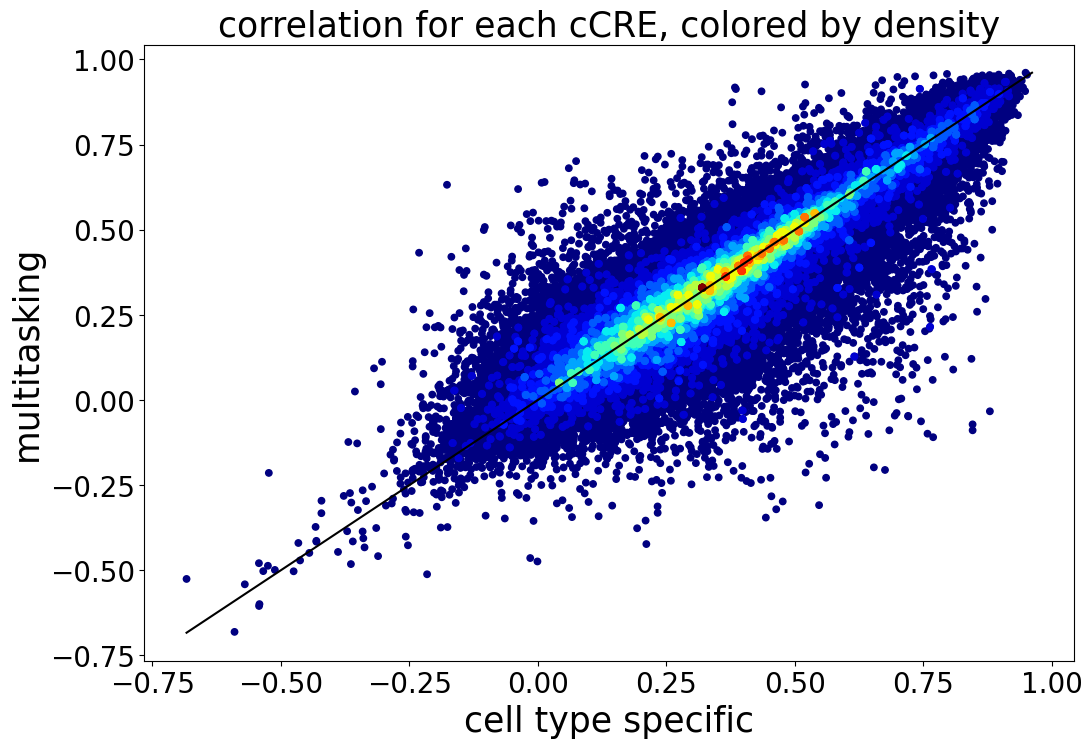

In [7]:
import matplotlib.pyplot as plt
x,y = np.array(correlations_ctst), np.array(correlations_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,8)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s = 85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=25)
plt.ylabel('multitasking', fontsize=25)
plt.title('correlation for each cCRE, colored by density', fontsize=25)
plt.tick_params(labelsize=20)

In [8]:
#for every element in the lists find which one is greater
x,y = np.array(correlations_ctst), np.array(correlations_mult2)
z = x-y
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))
print(np.sum(z>0)/(len(z)))

53892 51360 0
0.5120282749971496


In [ ]:
correlations_col_ctst = []
correlations_col_mult = []
correlations_col_mult2 = []
for i in tqdm(range(0, t_reg.shape[1])):
    corr, _ = pearsonr(t_reg[:,i], ctst_pred_class[:,i])
    correlations_col_ctst.append(corr)
    corr, _ = pearsonr(t_reg[:,i], mult_pred_class[:,i])
    correlations_col_mult.append(corr)
    corr, _ = pearsonr(t_reg[:,i], mult2_pred_class[:,i])
    correlations_col_mult2.append(corr)

100%|██████████| 161/161 [00:02<00:00, 75.72it/s]


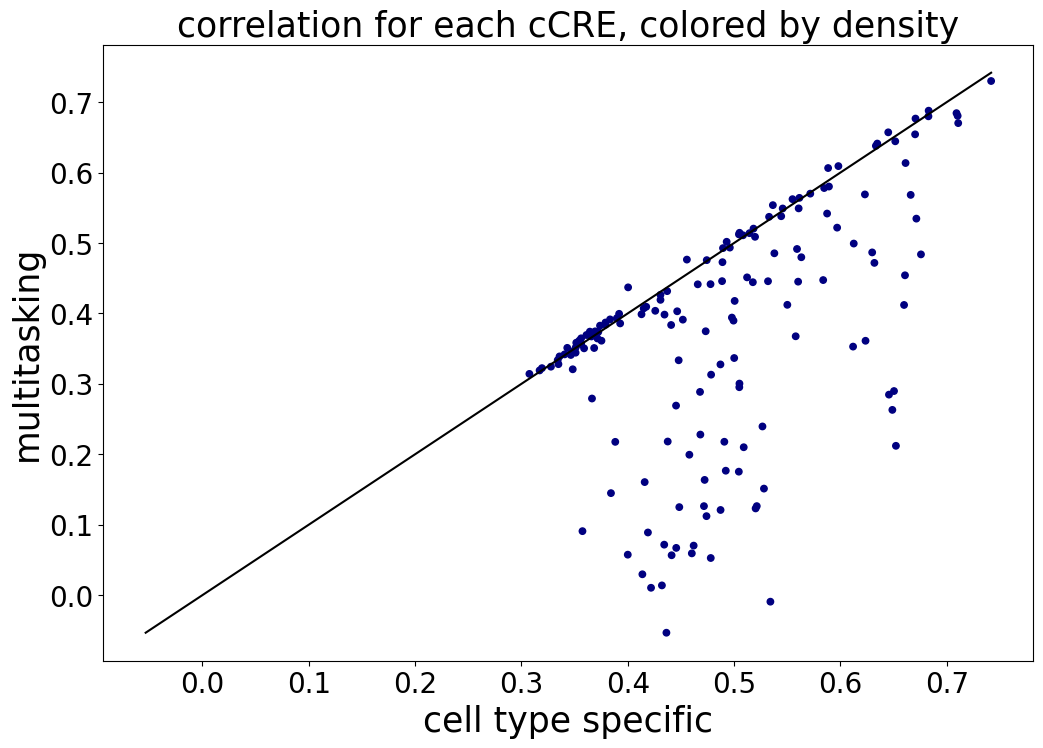

In [6]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,8)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=25)
plt.ylabel('multitasking', fontsize=25)
plt.title('correlation for each cell type, colored by density', fontsize=25)
plt.tick_params(labelsize=20)

In [18]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
z = x-y
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))
print(np.sum(z>0)/(len(z)))

116 45 0
0.7204968944099379


Text(0.5, 1.0, 'correlation for each cCRE, colored by density')

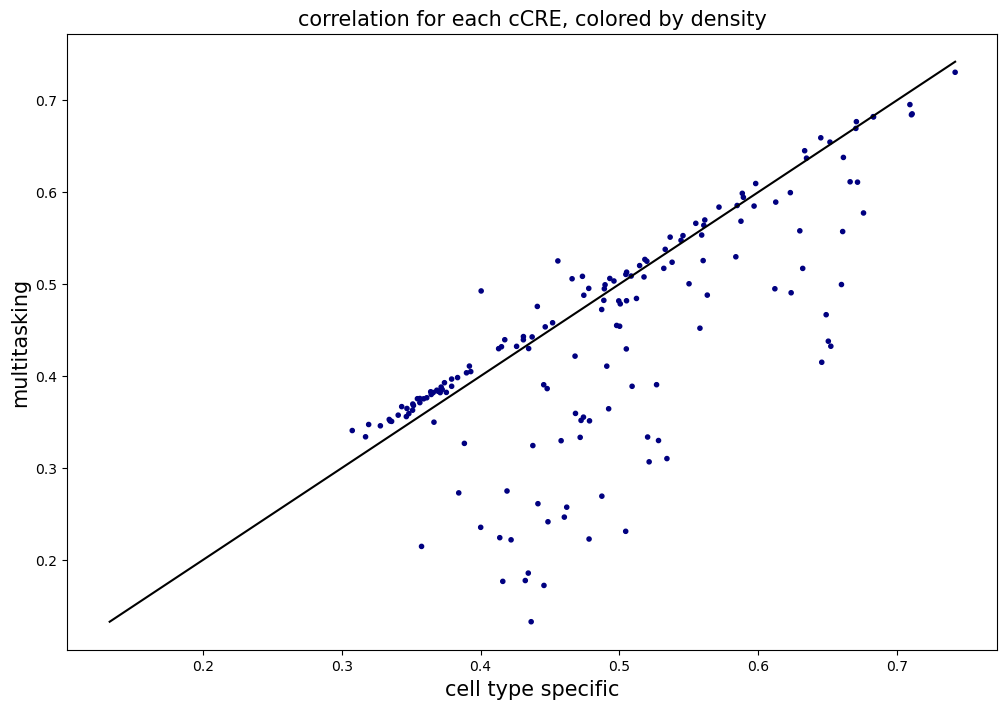

In [13]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,8)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.')
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=15)
plt.ylabel('multitasking', fontsize=15)
plt.title('correlation for each cCRE, colored by density', fontsize=15)
#boosted by the lower values, but in reality many where it is severely outperformed

In [20]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult)
z = x-y
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))
print(np.sum(z>0)/(len(z)))
#still 50%!!

82 79 0
0.5093167701863354


# add masking

In [3]:
#now we should mask it and compare to see how it does
#can 
#first we will make the figure comparing the models
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt')
mult_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_reg.pt')
mult_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_class.pt')
mult_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
print(mult_target_reg.shape, mult_pred_reg.shape, mult_target_class.shape, mult_pred_class.shape) #all are identical as expected
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == mult_target_reg))
print(torch.all(mult_target_reg == mult2_target_reg))
#perfect!
print(torch.all(ctst_target_class == mult_target_class))
print(torch.all(mult_target_class == mult2_target_class))
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg
t_reg

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
tensor(True)
tensor(True)
tensor(True)
tensor(True)


tensor([[-10.0000,  -0.4581, -10.0000,  ..., -10.0000,  -1.7576, -10.0000],
        [-10.0000,  -1.1888, -10.0000,  ..., -10.0000,  -3.0268,  -2.2397],
        [  0.2071,   1.3613,  -2.4325,  ...,  -0.7399,   4.2481,  -0.7007],
        ...,
        [  0.9784,   0.6225,   0.2469,  ...,   0.3363,   0.6615,  -0.4536],
        [  1.4823,   1.6966,   0.2309,  ...,   0.2233,   0.8615,  -0.2049],
        [  0.8997,   0.8567,   0.4843,  ...,   0.1876,   0.8940,  -1.0668]])

In [4]:
#now we need to mask out the values
mask = t_reg != -10
mask

tensor([[False,  True, False,  ..., False,  True, False],
        [False,  True, False,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [5]:
t_reg[0,mask[0,:]].shape #only 89! that's what we expect, now do this analysis and find correlations

torch.Size([72])

In [6]:
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_ctst = []
correlations_mult = []
correlations_mult2 = []
for i in tqdm(range(t_reg.shape[0])):
    # Apply the mask for the current row across all matrices
    current_mask = mask[i, :]
    t_reg_row = t_reg[i, current_mask]
    ctst_pred_reg_row = ctst_pred_reg[i, current_mask]
    mult_pred_reg_row = mult_pred_reg[i, current_mask]
    mult2_pred_reg_row = mult2_pred_reg[i, current_mask]
    corr, _ = pearsonr(t_reg_row, ctst_pred_reg_row)
    correlations_ctst.append(corr)

    corr, _ = pearsonr(t_reg_row, mult_pred_reg_row)
    correlations_mult.append(corr)

    corr, _ = pearsonr(t_reg_row, mult2_pred_reg_row)
    correlations_mult2.append(corr)

100%|██████████| 105252/105252 [04:04<00:00, 431.06it/s]


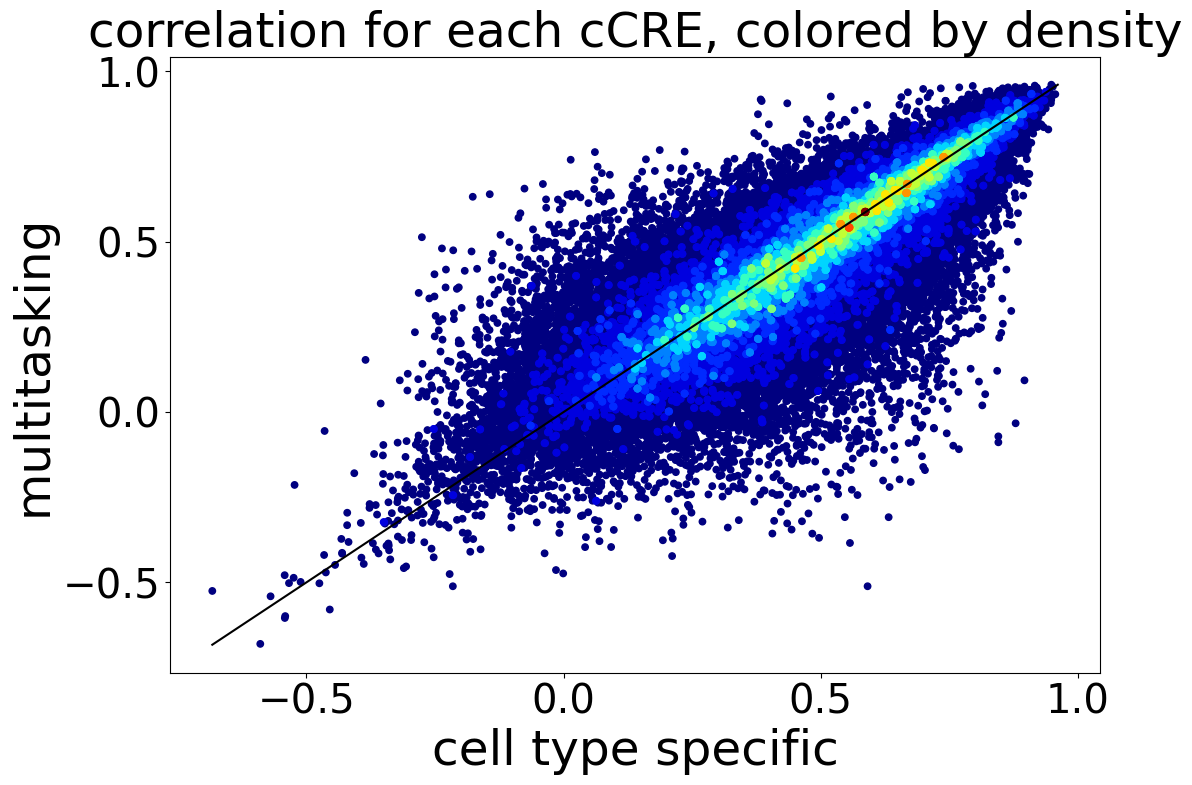

In [12]:
#this seems about right!
import matplotlib.pyplot as plt
x,y = np.array(correlations_ctst), np.array(correlations_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,8)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s = 85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('multitasking', fontsize=35)
plt.title('correlation for each cCRE, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [8]:
#and find amount more
x,y = np.array(correlations_ctst), np.array(correlations_mult2)
z = x-y
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))
print(np.sum(z>0)/(len(z))) #slightly more on ctst model

57579 47673 0
0.5470584881997492


In [7]:
#and let's do for the columns
correlations_col_ctst = []
correlations_col_mult = []
correlations_col_mult2 = []
for i in tqdm(range(t_reg.shape[1])):
    # Apply the mask for the current column across all matrices
    current_mask = mask[:, i]
    t_reg_col = t_reg[current_mask, i]
    ctst_pred_class_col = ctst_pred_class[current_mask, i]
    mult_pred_class_col = mult_pred_class[current_mask, i]
    mult2_pred_class_col = mult2_pred_class[current_mask, i]
    corr, _ = pearsonr(t_reg_col, ctst_pred_class_col)
    correlations_col_ctst.append(corr)

    corr, _ = pearsonr(t_reg_col, mult_pred_class_col)
    correlations_col_mult.append(corr)

    corr, _ = pearsonr(t_reg_col, mult2_pred_class_col)
    correlations_col_mult2.append(corr)

100%|██████████| 161/161 [00:02<00:00, 57.44it/s]


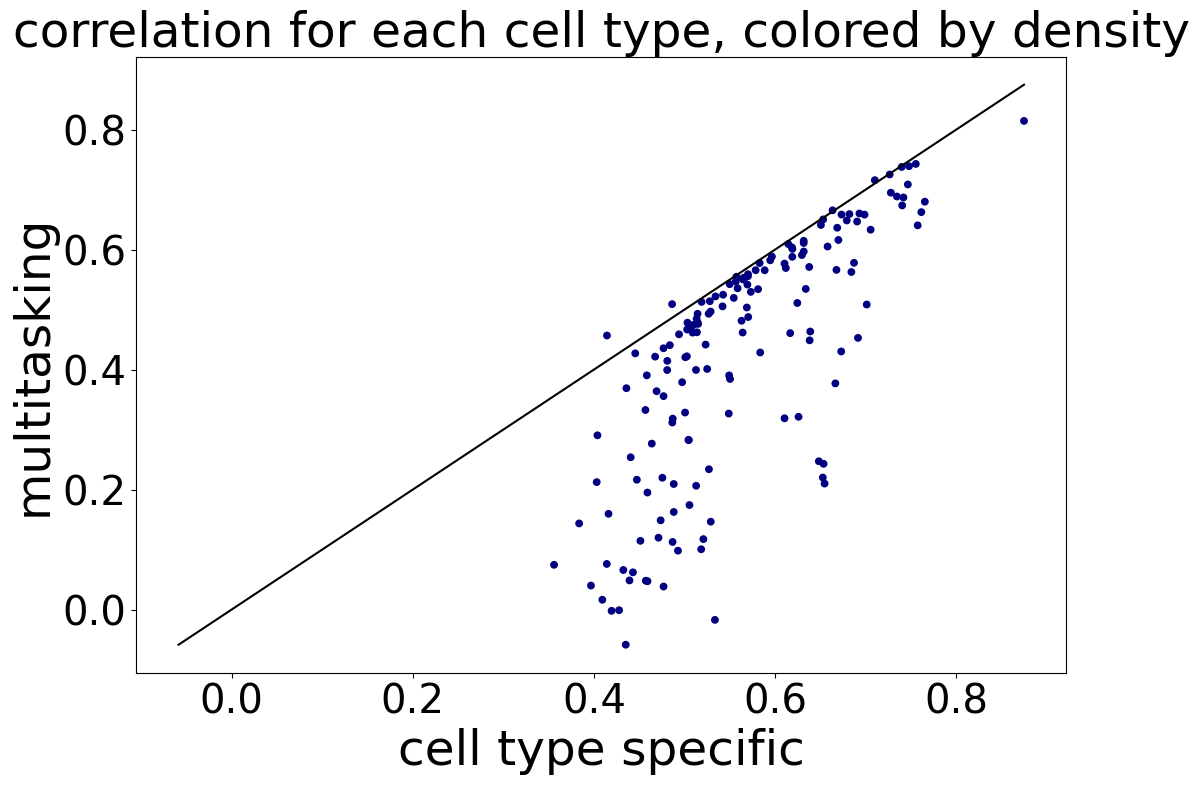

In [13]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,8)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('multitasking', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

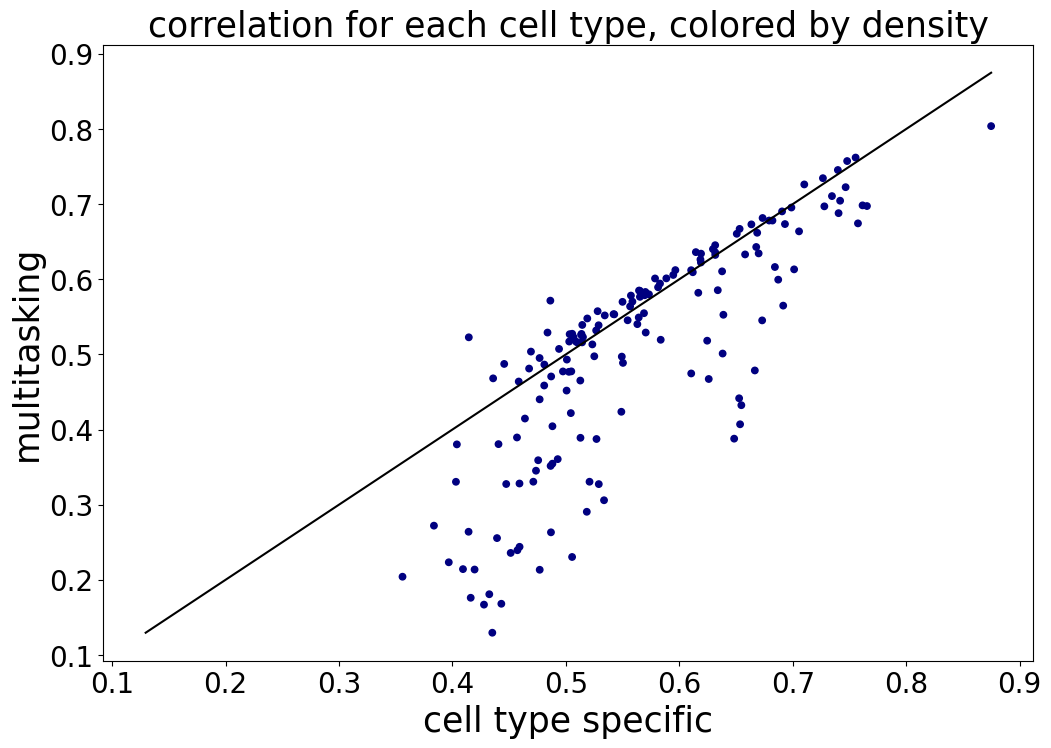

In [11]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,8)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=25)
plt.ylabel('multitasking', fontsize=25)
plt.title('correlation for each cell type, colored by density', fontsize=25)
plt.tick_params(labelsize=20)

# determining which cel types are bad

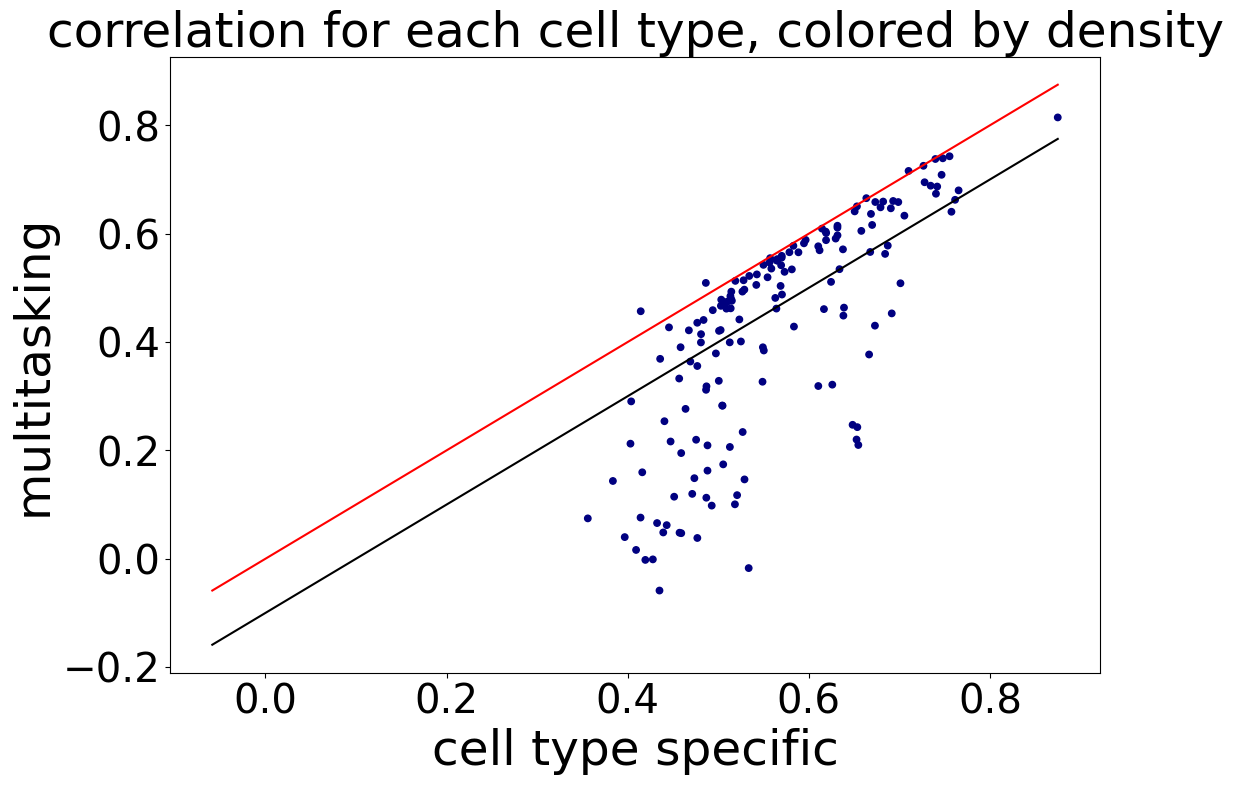

In [11]:
#let's plot it to define a cutoff
import matplotlib.pyplot as plt
residual=.1
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,8)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='r')
plt.plot([tempmin, tempmax], [tempmin-residual, tempmax-residual], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('multitasking', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [12]:
#.1 seems to be a decent cutoff, let's find the values that are above this
mask_celltypes = np.array(correlations_col_ctst) - np.array(correlations_col_mult2) > residual
print(mask_celltypes.shape)

(161,)


In [13]:
print(mask_celltypes) #ok this is perfect! got a list of the celltypes that 

[False False  True  True  True  True  True  True False  True  True False
 False  True  True False False False False  True  True False  True  True
 False False  True False False False  True False  True False  True  True
  True  True False False False False False False False False False False
 False False False  True False  True False False  True False False False
  True False False False False  True  True  True False False False  True
 False False  True  True  True  True False False False  True  True  True
 False  True  True  True False False False False  True False  True False
 False  True  True False False False False False  True False False False
  True False False False False False False False  True False False False
  True  True False  True  True  True  True  True  True  True  True False
  True False False False  True  True  True False  True  True  True False
 False  True  True False  True False  True  True False False False False
 False False False  True  True]


In [14]:
celltypesfile = '/data/leslie/sarthak/data/cCRE_celltype_matrices/cell_types_filtered.txt'
celltypes = []
with open(celltypesfile) as f:
    for line in f:
        celltypes.append(line.strip())
celltypes = np.array(celltypes)

In [21]:
#let's make a td array
array1 = celltypes[mask_celltypes]
array2 = (np.array(correlations_col_ctst)-np.array(correlations_col_mult2))[mask_celltypes] #the difference, or the residuals
new_array = np.stack((array1,array2),1)
print(new_array)

#now we can see that for some fibroblasts they're similar, for others they're terrible, definitely worth exploring! 
#but this could explain why it's so bad at GM attributions

[['COLO829' '0.12111293545231672']
 ['GM03348' '0.3046261501377265']
 ['AG08395' '0.22218156303138875']
 ['AG08396' '0.17534462868997447']
 ['AG20443' '0.2916827777494154']
 ['germinal_center_tissue' '0.15595708618964976']
 ['GM10248' '0.4011412117890727']
 ['GM10266' '0.43266902884196534']
 ['GM13976' '0.289574714262962']
 ['GM13977' '0.18944168846584752']
 ['GM20000' '0.4106633849024171']
 ['HEK293T' '0.15508149937522286']
 ['HPDE6-E6E7' '0.124011902215162']
 ['HTR-8/SVneo' '0.10247624050162107']
 ['CWRU1' '0.23873688491762357']
 ['D341Med' '0.24281004926366984']
 ['C803' '0.19274049353071787']
 ['RWPE1' '0.1589902667918724']
 ['SK-N-SH' '0.12159709397830154']
 ['urothelium_cell_line' '0.1659339699800655']
 ['A549' '0.11332183076625524']
 ['GM06990' '0.10159446585745036']
 ['GM12865' '0.38255954386387425']
 ['H7' '0.30653088870661677']
 ['cardiac_fibroblast' '0.11843591075230592']
 ['epithelial_cell_of_esophagus' '0.4034420942058869']
 ['fibroblast_of_gingiva' '0.3907317074334805']
 

In [22]:
#let's make a td array
array1 = celltypes
array2 = (np.array(correlations_col_ctst)-np.array(correlations_col_mult2)) #the difference, or the residuals
new_array = np.stack((array1,array2),1)
print(new_array)

#now we can see that for some fibroblasts they're similar, for others they're terrible, definitely worth exploring! 
#but this could explain why it's so bad at GM attributions

[['8988T' '0.00196911876641781']
 ['chorion_tissue' '-0.005605444363023904']
 ['COLO829' '0.12111293545231672']
 ['GM03348' '0.3046261501377265']
 ['AG08395' '0.22218156303138875']
 ['AG08396' '0.17534462868997447']
 ['AG20443' '0.2916827777494154']
 ['germinal_center_tissue' '0.15595708618964976']
 ['H54' '0.014987163717088525']
 ['GM10248' '0.4011412117890727']
 ['GM10266' '0.43266902884196534']
 ['GM12891' '0.008855117625860887']
 ['GM12892' '0.012552669976347297']
 ['GM13976' '0.289574714262962']
 ['GM13977' '0.18944168846584752']
 ['GM18507' '0.04254200071881342']
 ['GM19238' '0.04047742626317563']
 ['GM19239' '0.04380363712826996']
 ['GM19240' '0.0205140255149463']
 ['GM20000' '0.4106633849024171']
 ['HEK293T' '0.15508149937522286']
 ['hepatocyte' '0.014841767457200561']
 ['HPDE6-E6E7' '0.124011902215162']
 ['HTR-8/SVneo' '0.10247624050162107']
 ['HuH-7' '0.06664093659039483']
 ['endothelial_cell_of_umbilical_vein_newborn' '0.009541085978349018']
 ['CWRU1' '0.23873688491762357']


# do violin plots and statistical tests to determine difference

#can do it across CREs and celltypes

# grouping and violin plot per promoter vs enhancer etc

In [1]:
# the real answer is let's group it and then do a violin plot
#now we should mask it and compare to see how it does
#can 
#first we will make the figure comparing the models
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt')
mult_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_reg.pt')
mult_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_class.pt')
mult_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
print(mult_target_reg.shape, mult_pred_reg.shape, mult_target_class.shape, mult_pred_class.shape) #all are identical as expected
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == mult_target_reg))
print(torch.all(mult_target_reg == mult2_target_reg))
#perfect!
print(torch.all(ctst_target_class == mult_target_class))
print(torch.all(mult_target_class == mult2_target_class))
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg
t_reg
#now we need to mask out the values
mask = t_reg != -10
mask
t_reg[0,mask[0,:]].shape #only 89! that's what we expect, now do this analysis and find correlations
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_ctst = []
correlations_mult = []
correlations_mult2 = []
for i in tqdm(range(t_reg.shape[0])):
    # Apply the mask for the current row across all matrices
    current_mask = mask[i, :]
    t_reg_row = t_reg[i, current_mask]
    ctst_pred_reg_row = ctst_pred_reg[i, current_mask]
    mult_pred_reg_row = mult_pred_reg[i, current_mask]
    mult2_pred_reg_row = mult2_pred_reg[i, current_mask]
    corr, _ = pearsonr(t_reg_row, ctst_pred_reg_row)
    correlations_ctst.append(corr)

    corr, _ = pearsonr(t_reg_row, mult_pred_reg_row)
    correlations_mult.append(corr)

    corr, _ = pearsonr(t_reg_row, mult2_pred_reg_row)
    correlations_mult2.append(corr)

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
tensor(True)
tensor(True)
tensor(True)
tensor(True)


100%|██████████| 105252/105252 [03:54<00:00, 448.61it/s]


In [3]:
#now we load in the ism utilities to easily find what type it is
from shap_analysis.ism_utils import ISMUtils
ctst_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-25/15-41-13-286486/checkpoints/last.ckpt'
utils = ISMUtils('DNase_ctst', ctst_path, classification=True, split='test') #crucially make it test, so that we can easily check what type they are

In [4]:
utils.find_ccre_type(0) #this is a promoter

'DNase-H3K4me3,CTCF-bound'

In [7]:
print(np.unique(utils.bed[:,-1]))

['CTCF-only,CTCF-bound' 'DNase-H3K4me3' 'DNase-H3K4me3,CTCF-bound' 'PLS'
 'PLS,CTCF-bound' 'dELS' 'dELS,CTCF-bound' 'pELS' 'pELS,CTCF-bound']


In [22]:
#let's split it up by type, can have multiple labels assigned to it
dels_list = np.zeros(t_reg.shape[0], dtype=bool)
print(dels_list.shape) #one for each CRE, is a mask of 0 or 1
CTCF_list = np.zeros(t_reg.shape[0], dtype=bool)
H3K4me3_list = np.zeros(t_reg.shape[0], dtype=bool)
PLS_list = np.zeros(t_reg.shape[0], dtype=bool)
pels_list = np.zeros(t_reg.shape[0], dtype=bool)

#create these arrays as true or false

(105252,)


In [23]:
#now we can loop through and label it
for i in range(t_reg.shape[0]):
    if 'dELS' in utils.find_ccre_type(i):
        dels_list[i] = 1
    elif 'CTCF' in utils.find_ccre_type(i):
        CTCF_list[i] = 1
    elif 'H3K4me3' in utils.find_ccre_type(i):
        H3K4me3_list[i] = 1
    elif 'PLS' in utils.find_ccre_type(i):
        PLS_list[i] = 1
    elif 'pELS' in utils.find_ccre_type(i):
        pels_list[i] = 1
    else:
        print('error')
        break

In [34]:
print(dels_list)
print(utils.find_ccre_type(0), utils.find_ccre_type(1), ) #seems good!

[False  True  True ...  True  True  True]
DNase-H3K4me3,CTCF-bound dELS


In [24]:
#now we do paired violin plots
import pandas as pd
df = pd.DataFrame({
    'correlations_ctst': correlations_ctst,
    'correlations_mult2': correlations_mult2,
    'dels': dels_list,
    'CTCF': CTCF_list,
    'H3K4me3': H3K4me3_list,
    'PLS': PLS_list,
    'pels': pels_list
})

# Melt the DataFrame to long format for easier plotting
df_long = df.melt(id_vars=['correlations_ctst', 'correlations_mult2'], 
                  value_vars=['dels', 'CTCF', 'H3K4me3', 'PLS', 'pels'],
                  var_name='mask', value_name='included')

# Filter to include only True cases
print(df_long.shape)
df_long.head()

(526260, 4)


,correlations_ctst,correlations_mult2,mask,included
0,0.619254,0.527659,dels,False
1,0.675560,0.695227,dels,True
2,0.482733,0.343322,dels,True
3,0.394517,0.553701,dels,False
4,0.488565,0.305314,dels,False


In [25]:
df.head()

,correlations_ctst,correlations_mult2,dels,CTCF,H3K4me3,PLS,pels
0,0.619254,0.527659,False,True,False,False,False
1,0.675560,0.695227,True,False,False,False,False
2,0.482733,0.343322,True,False,False,False,False
3,0.394517,0.553701,False,True,False,False,False
4,0.488565,0.305314,False,True,False,False,False


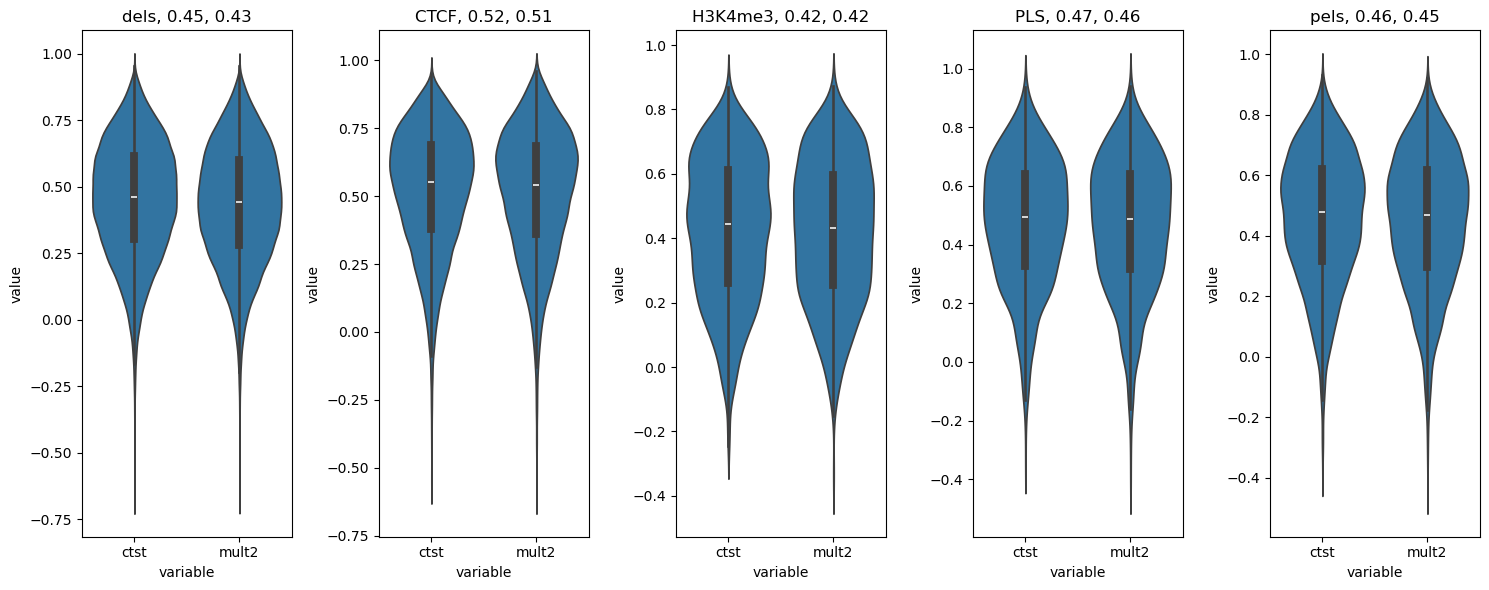

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
import seaborn as sns

# Loop through each unique mask and create a subplot
for i, mask in enumerate(['dels', 'CTCF', 'H3K4me3', 'PLS', 'pels'], 1):
    plt.subplot(1, 5, i)  # Adjust subplot layout as needed
    mask_df = df[df[mask]]  # Filter DataFrame by mask
    # Prepare data for violin plot
    data_to_plot = pd.concat([
        mask_df[['correlations_ctst']].rename(columns={'correlations_ctst': 'value'}).assign(variable='ctst'),
        mask_df[['correlations_mult2']].rename(columns={'correlations_mult2': 'value'}).assign(variable='mult2')
    ])
    sns.violinplot(x='variable', y='value', data=data_to_plot)
    #find the mean of the two
    ctst_mean = mask_df['correlations_ctst'].mean()
    mult2_mean = mask_df['correlations_mult2'].mean()
    plt.title(f'{mask}, {ctst_mean:.2f}, {mult2_mean:.2f}')  # Set title to the name of the mask

plt.tight_layout()
plt.show()

#this is actually pretty troubling

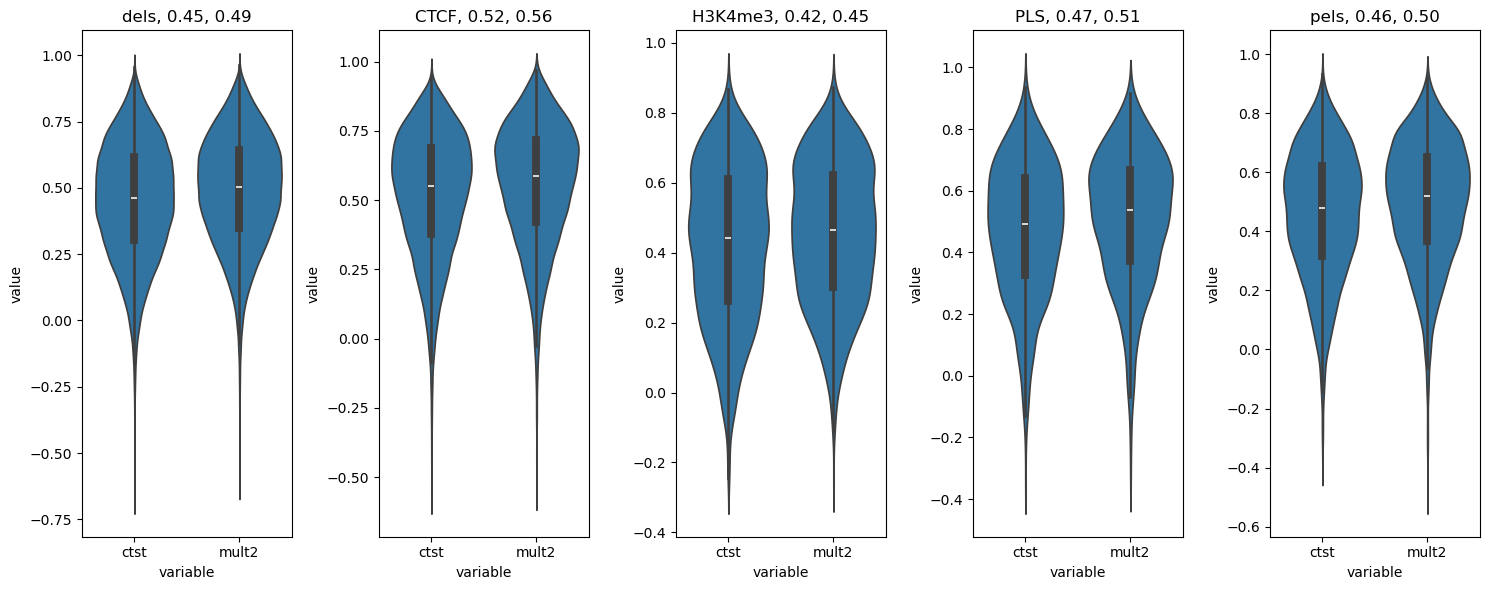

In [35]:
df = pd.DataFrame({
    'correlations_ctst': correlations_ctst,
    'correlations_mult': correlations_mult,
    'dels': dels_list,
    'CTCF': CTCF_list,
    'H3K4me3': H3K4me3_list,
    'PLS': PLS_list,
    'pels': pels_list
})
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
import seaborn as sns

# Loop through each unique mask and create a subplot
for i, mask in enumerate(['dels', 'CTCF', 'H3K4me3', 'PLS', 'pels'], 1):
    plt.subplot(1, 5, i)  # Adjust subplot layout as needed
    mask_df = df[df[mask]]  # Filter DataFrame by mask
    # Prepare data for violin plot
    data_to_plot = pd.concat([
        mask_df[['correlations_ctst']].rename(columns={'correlations_ctst': 'value'}).assign(variable='ctst'),
        mask_df[['correlations_mult']].rename(columns={'correlations_mult': 'value'}).assign(variable='mult2')
    ])
    sns.violinplot(x='variable', y='value', data=data_to_plot)
    #find the mean of the two
    ctst_mean = mask_df['correlations_ctst'].mean()
    mult2_mean = mask_df['correlations_mult'].mean()
    plt.title(f'{mask}, {ctst_mean:.2f}, {mult2_mean:.2f}')  # Set title to the name of the mask

plt.tight_layout()
plt.show()

#this is actually pretty troubling

#instead of pairs, do one on the right one on th eleft

In [32]:
data_to_plot.tail()

,value,variable
105221,0.600961,mult2
105228,0.360860,mult2
105229,0.617070,mult2
105238,0.434285,mult2
105239,0.539679,mult2


In [37]:
#manually verify the means by masking and getting the mean
ctst_dels = np.array(correlations_ctst)[dels_list].mean()
mult_dels = np.array(correlations_mult)[dels_list].mean()
print(ctst_dels, mult_dels)
#yeah seems right I guess, ,so results are just not promising I guess in terms of regression predictions?
#could do the same for the classification to compare, but it's probalby not worth it tbh idk

0.45200212190576244 0.4895277567493937
